# Lab 3 - Data Storytelling

For this Lab you guys will be going through the thought-process of how Data Scientists in the real world extract, clean, explore and eventually visualize data to make inferences about real-world problems. Since this is a guided-lab it will be graded just as strictly since everything is provided to you.

**Note:** Please make sure you use the environment you guys created for Homework 2 - the one which contains Seaborn 0.9.0 - as it would be extremely difficult for you to make the same plots as in the blog post otherwise. Open the Homework 2 notebook if you are unsure on how to switch to that environment.

Once again - name the notebooks as Lab3_rollno.ipynb

Here are the links you have to follow for this lab (you HAVE to follow both links)

[Data Storytelling Part One](https://towardsdatascience.com/homicide-in-chicago-data-storytelling-part-one-e6fbd77afc07)

[Data Storytelling Part Two](https://towardsdatascience.com/homicide-in-chicago-data-stroytelling-part-two-e8748602daca)


## Part 1: Data Cleaning
All the plots in the blog-post should be printed in this part. Here all of you have the freedom to break up the cells as you wish - so that you also get practice in that regard.

In [1]:
import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

In [2]:
# use TextFileReader iterable with chunks of 100,000 rows.
tp = read_csv('Crimes_-_2001_to_present.csv', iterator=True, chunksize=100000)  
crime_data = concat(tp, ignore_index=True)  

# print data's shape
crime_data.shape

(6749001, 22)

In [3]:
crime_data.info()

crime_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6749001 entries, 0 to 6749000
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.0+ GB


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [4]:
# preview all crime variables in the "Primary Type" column

crimes = crime_data['Primary Type'].sort_values().unique()
crimes, len(crimes)

(array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
        'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
        'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
        'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
        'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
        'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
        'NON - CRIMINAL', 'NON-CRIMINAL',
        'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
        'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
        'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
        'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
        'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object), 35)

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Crime Distribution per District')

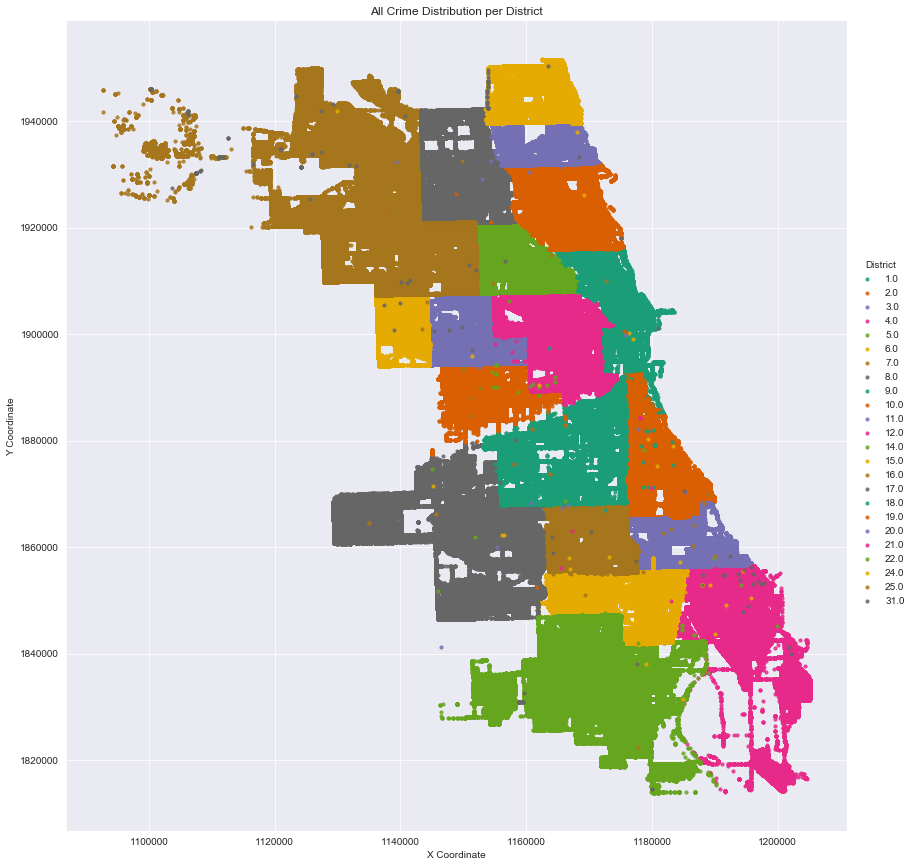

In [5]:
# Created a scatter plot of X and Y coordinates vs all crime data available in the dataset

crime_data = crime_data.loc[(crime_data['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=crime_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

In [6]:
# create and preview dataframe containing crimes associated with gang violence

col2 = ['Date','Primary Type','Arrest','Domestic','District','X Coordinate','Y Coordinate']
multiple_crimes = crime_data[col2]
multiple_crimes = multiple_crimes[multiple_crimes['Primary Type']\
                  .isin(['HOMICIDE','CONCEALED CARRY LICENSE VIOLATION','NARCOTICS','WEAPONS VIOLATION'])]

# clean some rouge (0,0) coordinates
multiple_crimes = multiple_crimes[multiple_crimes['X Coordinate']!=0]


multiple_crimes.head()

,Date,Primary Type,Arrest,Domestic,District,X Coordinate,Y Coordinate
8,03/18/2015 10:09:00 PM,NARCOTICS,True,False,9.0,1164279.0,1880656.0
12,03/18/2015 09:14:00 PM,WEAPONS VIOLATION,True,False,4.0,1197309.0,1848290.0
24,03/18/2015 09:44:00 PM,WEAPONS VIOLATION,True,False,15.0,1139051.0,1899715.0
36,03/19/2015 01:15:00 AM,NARCOTICS,True,False,10.0,1153173.0,1889153.0
42,03/19/2015 02:45:00 AM,NARCOTICS,True,False,11.0,1150409.0,1899258.0


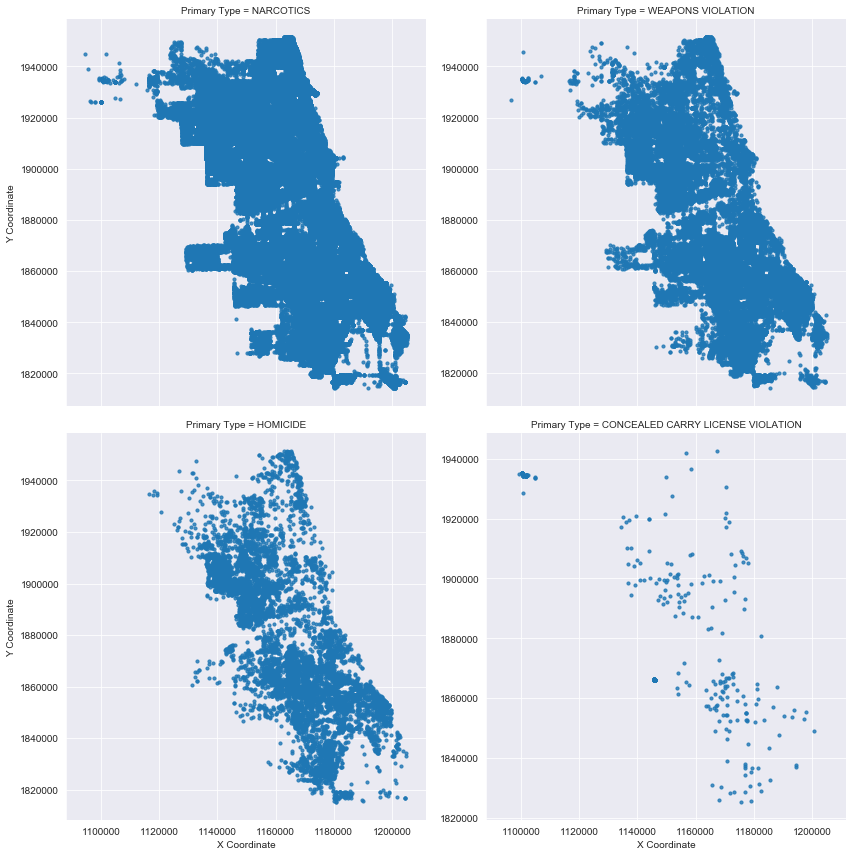

In [7]:
# geographical distribution scatter plots by crime
g = sns.lmplot(x="X Coordinate",
               y="Y Coordinate",
               col="Primary Type",
               data=multiple_crimes.dropna(), 
               col_wrap=2, size=6, fit_reg=False, 
               sharey=False,
               scatter_kws={"marker": "D",
                            "s": 10})

In [8]:
# create a dataframe with Homicide as the only crime

df_homicide_temp = crime_data[crime_data['Primary Type']=='HOMICIDE']
df_homicide_temp.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
638,4756,HP587530,09/22/2008 11:24:00 PM,047XX W GLADYS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,24.0,25.0,01A,1144818.0,1897935.0,2008,08/17/2015 03:03:40 PM,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1241,4757,HP587531,09/22/2008 11:37:00 PM,022XX S KIRKLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,22.0,29.0,01A,1147705.0,1888660.0,2008,08/17/2015 03:03:40 PM,41.850436,-87.733386,"(41.850436084, -87.733385899)"
1786,4758,HP572693,09/23/2008 09:57:00 AM,027XX W POPE JOHN PAUL II DR,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,...,12.0,58.0,01A,1158655.0,1876028.0,2008,08/17/2015 03:03:40 PM,41.815555,-87.693543,"(41.815555438, -87.693542513)"
2282,4759,HP588309,09/23/2008 01:40:00 PM,056XX W 64TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,13.0,64.0,01A,1139888.0,1861562.0,2008,08/17/2015 03:03:40 PM,41.776221,-87.762736,"(41.776221083, -87.762736483)"
2895,4760,HP589244,09/23/2008 08:25:00 PM,088XX S PRAIRIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,6.0,44.0,01A,1179584.0,1846297.0,2008,08/17/2015 03:03:40 PM,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [9]:
# print some attributes of our new homicide dataframe

df_homicide_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9379 entries, 638 to 6749000
Data columns (total 22 columns):
ID                      9379 non-null int64
Case Number             9379 non-null object
Date                    9379 non-null object
Block                   9379 non-null object
IUCR                    9379 non-null object
Primary Type            9379 non-null object
Description             9379 non-null object
Location Description    9379 non-null object
Arrest                  9379 non-null bool
Domestic                9379 non-null bool
Beat                    9379 non-null int64
District                9379 non-null float64
Ward                    9046 non-null float64
Community Area          9046 non-null float64
FBI Code                9379 non-null object
X Coordinate            9375 non-null float64
Y Coordinate            9375 non-null float64
Year                    9379 non-null int64
Updated On              9379 non-null object
Latitude                9375 non-nu

In [10]:
df_homicide_temp.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description      0
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                    333
Community Area          333
FBI Code                  0
X Coordinate              4
Y Coordinate              4
Year                      0
Updated On                0
Latitude                  4
Longitude                 4
Location                  4
dtype: int64

In [11]:
# drop null values and confirm

df_homicide = df_homicide_temp.dropna()
df_homicide.isnull().sum().sum()

0

In [12]:
# create a list of columns to keep and update the dataframe with new columns

keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,638,2008,09/22/2008 11:24:00 PM,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1241,2008,09/22/2008 11:37:00 PM,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1786,2008,09/23/2008 09:57:00 AM,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2282,2008,09/23/2008 01:40:00 PM,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2895,2008,09/23/2008 08:25:00 PM,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [13]:
# change string Date to datetime.datetime format

df_homicide['Date'] = df_homicide['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,638,2008,2008-09-22 23:24:00,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1241,2008,2008-09-22 23:37:00,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1786,2008,2008-09-23 09:57:00,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2282,2008,2008-09-23 13:40:00,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2895,2008,2008-09-23 20:25:00,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [14]:
# create new columns from date column -- Year, Month, Day, Hour, Minutes, DayOfWeek 

df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour

df_homicide = df_homicide.sort_values('Date')
# print columns list and info

df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9044 entries, 505 to 9043
Data columns (total 18 columns):
index                   9044 non-null int64
Year                    9044 non-null int64
Date                    9044 non-null datetime64[ns]
Primary Type            9044 non-null object
Arrest                  9044 non-null bool
Domestic                9044 non-null bool
District                9044 non-null float64
Location Description    9044 non-null object
FBI Code                9044 non-null object
X Coordinate            9044 non-null float64
Y Coordinate            9044 non-null float64
Latitude                9044 non-null float64
Longitude               9044 non-null float64
Location                9044 non-null object
Month                   9044 non-null int64
Day                     9044 non-null int64
Weekday                 9044 non-null int64
HourOfDay               9044 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6), object(4)
memory usa

In [15]:
# save cleaned data to pickle file 
df_homicide.to_pickle('df_homicide.pkl') 
print('pickle size:', os.stat('df_homicide.pkl').st_size)

# load pickled data 
df_homicide = pd.read_pickle('df_homicide.pkl')

pickle size: 1358721


## Part 2: Data Exploration and Visualization
Make sure ALL plots are printed just like in the blog-post. Although you can of course add details of your own if you wish and carry out some exploration on your own.

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Homicides (2001-2018) per District')

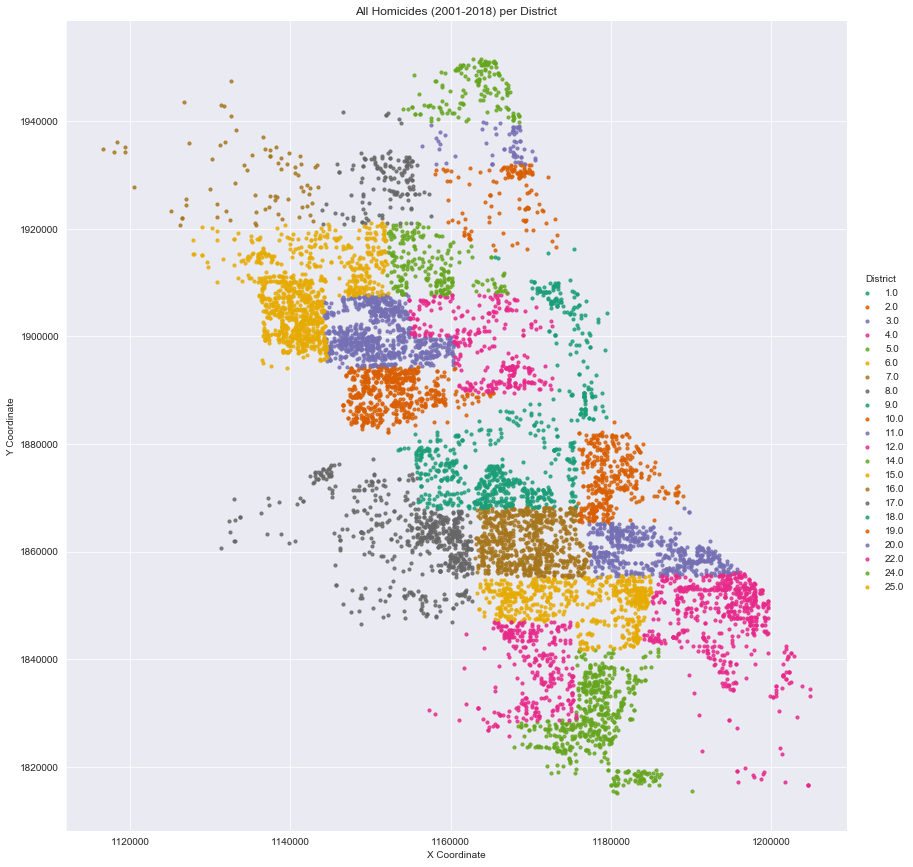

In [16]:
# plot all homicides in dataset by location per District

df_homicide = df_homicide.loc[(df_homicide['X Coordinate']!=0)]

sns.lmplot('X Coordinate',
           'Y Coordinate',
           data=df_homicide[:],
           fit_reg=False, 
           hue="District", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("All Homicides (2001-2018) per District")

Text(0.5, 1.0, 'CHICAGO MURDER RATES: 2001 - 2018')

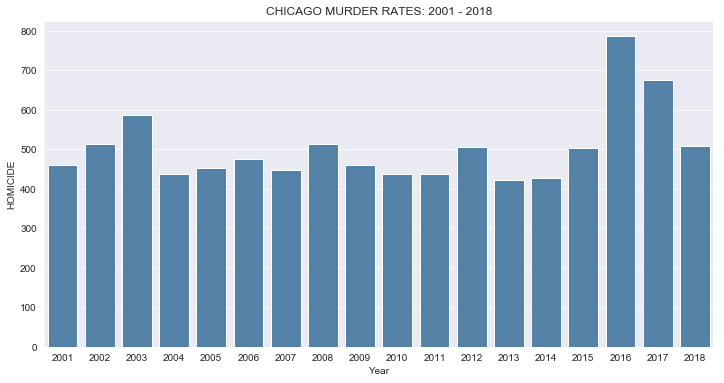

In [17]:
# plot bar chart of homicide rates for all years

plt.figure(figsize=(12,6))
sns.barplot(x='Year',
            y='HOMICIDE',
            data=df_homicide.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("CHICAGO MURDER RATES: 2001 - 2018")

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


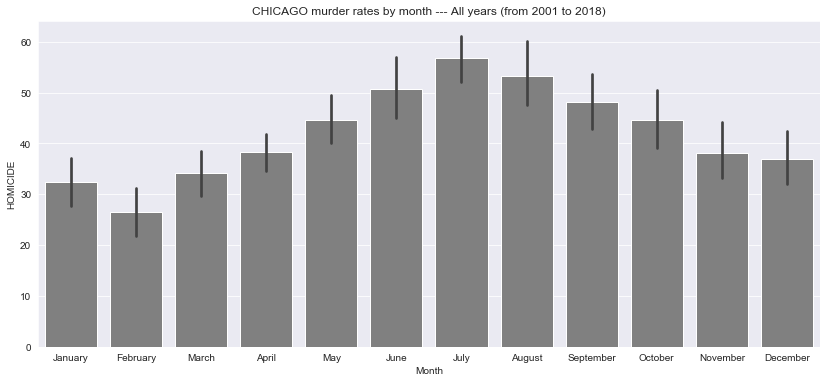

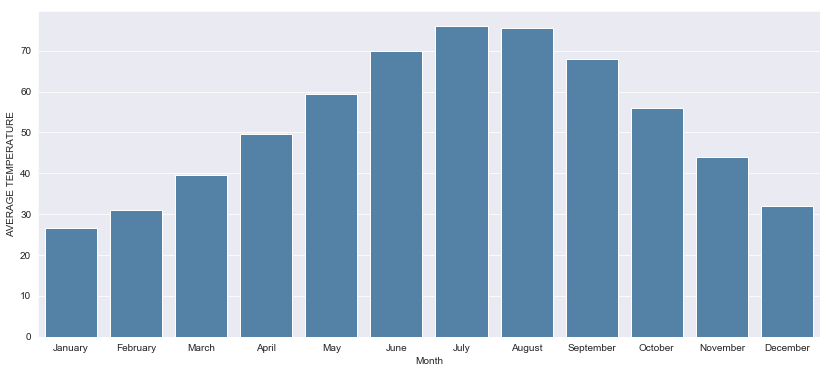

In [18]:
# plot homicides sorted by month


month_names = ['January','February','March','April','May','June','July','August',
               'September','October','November','December']
fig, ax = plt.subplots(figsize=(14,6))

fig = sns.barplot(x='Month', y='HOMICIDE', data=df_homicide.groupby(['Year', 'Month'])
                  ['Primary Type'].value_counts().unstack().reset_index(), color='#808080')

ax.set_xticklabels(month_names)
plt.title("CHICAGO murder rates by month --- All years (from 2001 to 2018)")


# plot average monthly temps in Chicago
# source of data:  ncdc.noaa.gov

monthly_temp = [26.5,31,39.5,49.5,59.5,70,76,75.5,68,56,44,32]
df_temps = pd.DataFrame(list(zip(month_names,monthly_temp)),
                       columns=['Month','AVERAGE TEMPERATURE'])
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='Month', y='AVERAGE TEMPERATURE', data=df_temps,color='steelblue')

Text(0.5, 1.0, 'HOMICIDE BY DAY OF THE WEEK -- All Years (2001 to 2008)')

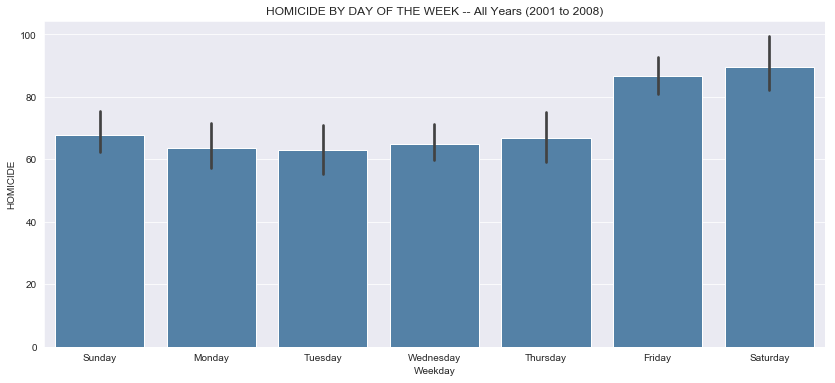

In [19]:
# plot homicide rates vs. day of the week

fig, ax = plt.subplots(figsize=(14,6))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
fig = sns.barplot(x='Weekday',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Weekday'])['Primary Type'].
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('HOMICIDE BY DAY OF THE WEEK -- All Years (2001 to 2008)')

Text(0.5, 1.0, 'HOMICIDE BY HOUR OF THE DAY -- All Years')

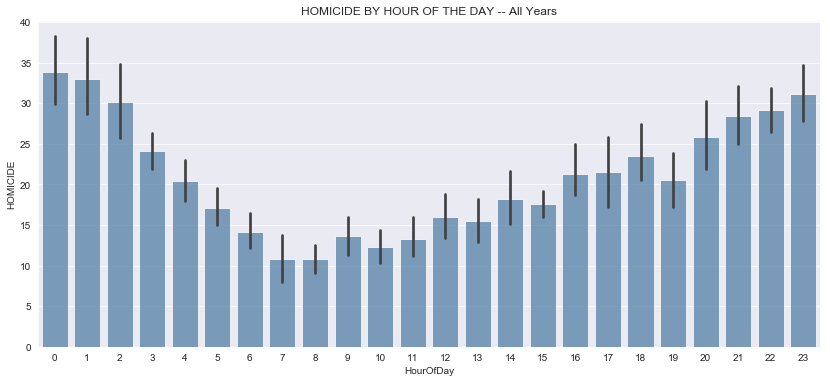

In [20]:
# use seaborn barplot to plot homicides vs. hour of the day 

fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='HourOfDay',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue',
                  alpha=.75)
plt.title('HOMICIDE BY HOUR OF THE DAY -- All Years')

Text(0.5, 1.0, 'HOMICIDE - DOMESTIC STATS BY YEAR')

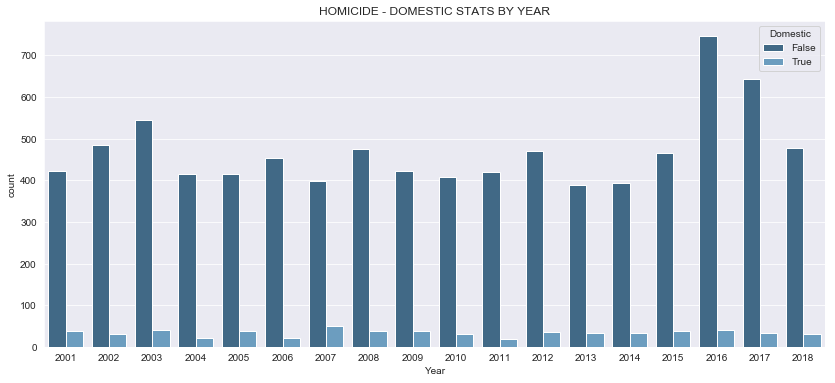

In [21]:
# plot domestic variable vs. homicide variable

fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Domestic']]
ax = sns.countplot(x="Year",
                   hue='Domestic',
                   data=df_arrest,
                   palette="Blues_d")
plt.title('HOMICIDE - DOMESTIC STATS BY YEAR')

In [22]:
# visualize the "scene of the crime" vs. number of occurences at such scene

crime_scene = df_homicide['Primary Type'].\
            groupby(df_homicide['Location Description']).\
            value_counts().\
            unstack().\
            sort_values('HOMICIDE',ascending=False).\
            reset_index()
    
# Top Homicide Crime Scene Locations
crime_scene.head(10)

Primary Type,Location Description,HOMICIDE
0,STREET,4414
1,AUTO,1062
2,APARTMENT,768
3,ALLEY,581
4,HOUSE,497
5,PORCH,275
6,YARD,200
7,PARKING LOT,150
8,PARK PROPERTY,104
9,VACANT LOT,91


c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CRIME SCENE BY LOCATION FREQUENCY')

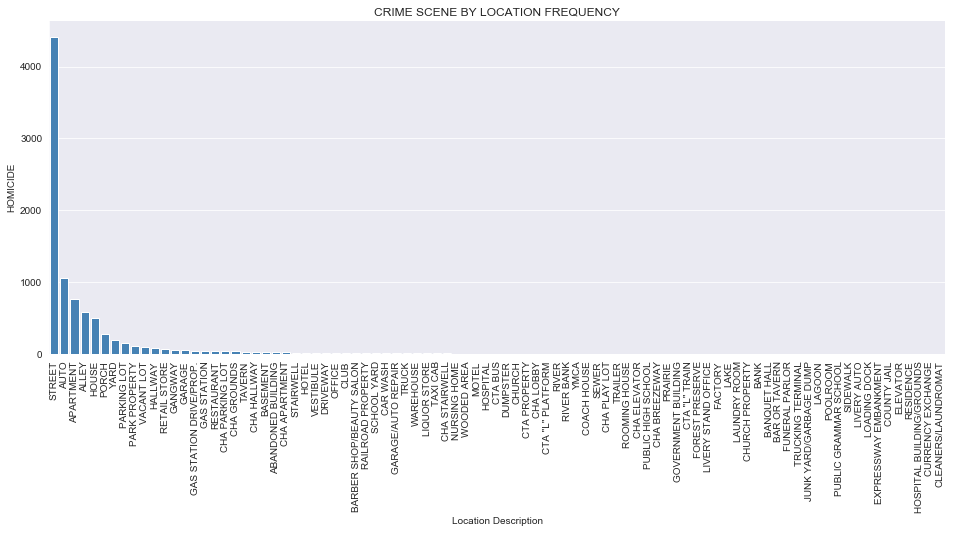

In [23]:
# create a count plot for all crime scene locations

g = sns.factorplot(x='Location Description',
                   y='HOMICIDE',
                   data=crime_scene,
                   kind='bar',
                   size=10,
                   color='steelblue', 
                   saturation=10)

g.fig.set_size_inches(15,5)
g.set_xticklabels(rotation=90)
plt.title('CRIME SCENE BY LOCATION FREQUENCY')

Text(0.5, 1.0, 'HOMICIDE vs DISTRICT vs YEAR')

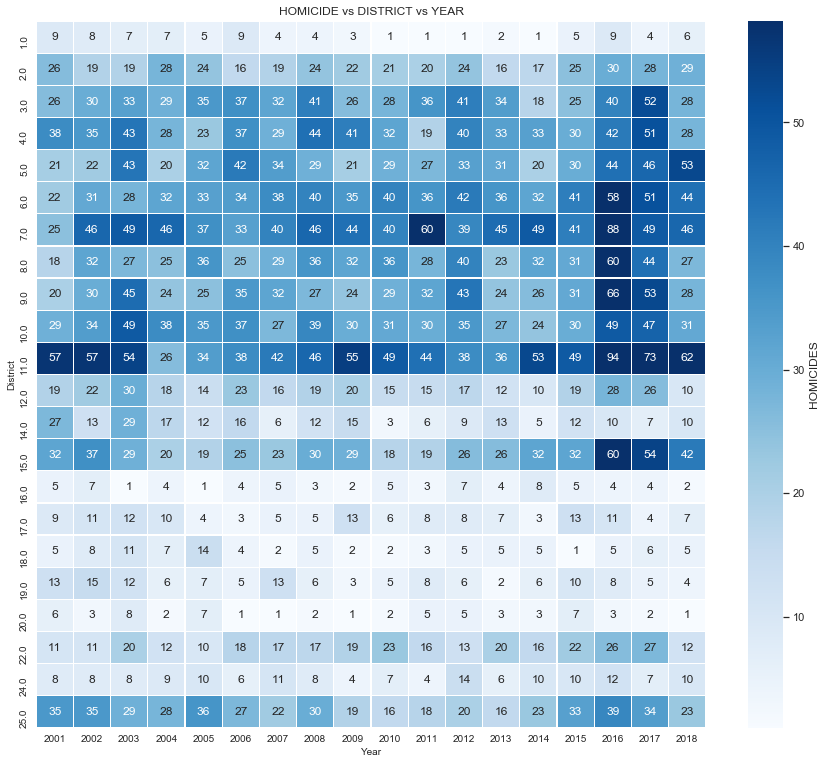

In [24]:
# create a heatmap showing crime by district by year

corr = df_homicide.groupby(['District','Year']).count().Date.unstack()
fig, ax = plt.subplots(figsize=(15,13))
sns.set(font_scale=1.0)
sns.heatmap(corr.dropna(axis=1),
            annot=True,
           linewidths=0.2,
           cmap='Blues',
            robust=True,
           cbar_kws={'label': 'HOMICIDES'})
plt.title('HOMICIDE vs DISTRICT vs YEAR')

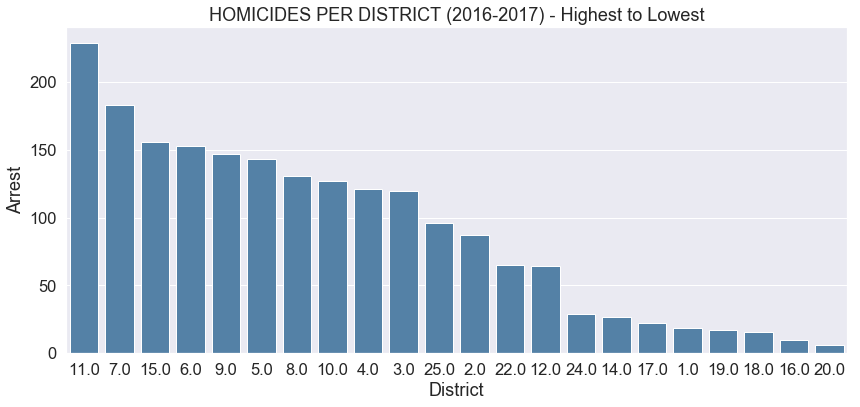

In [25]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('HOMICIDES PER DISTRICT (2016-2017) - Highest to Lowest')

Text(0.5, 1.0, 'HOMICIDE - ARRESTS STATS BY YEAR')

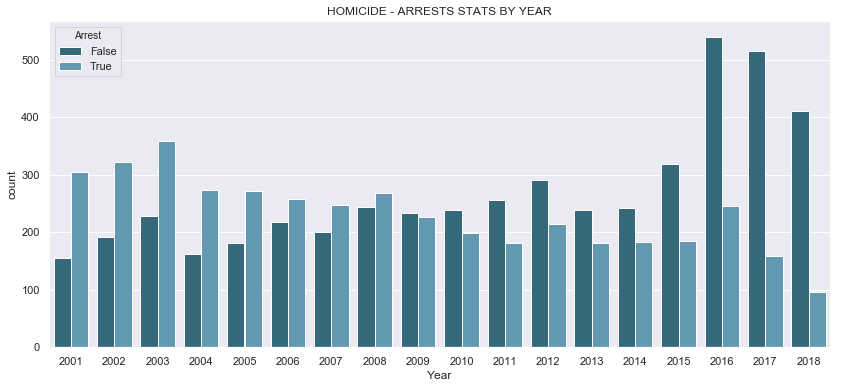

In [26]:
# create seaborn countplots  for whole dataset

fig, ax = plt.subplots(figsize=(14,6))
df_arrest = df_homicide[['Year','Arrest']]
ax = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df_arrest,
                   palette="PuBuGn_d")
plt.title('HOMICIDE - ARRESTS STATS BY YEAR')

Text(0.5, 1.0, 'HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

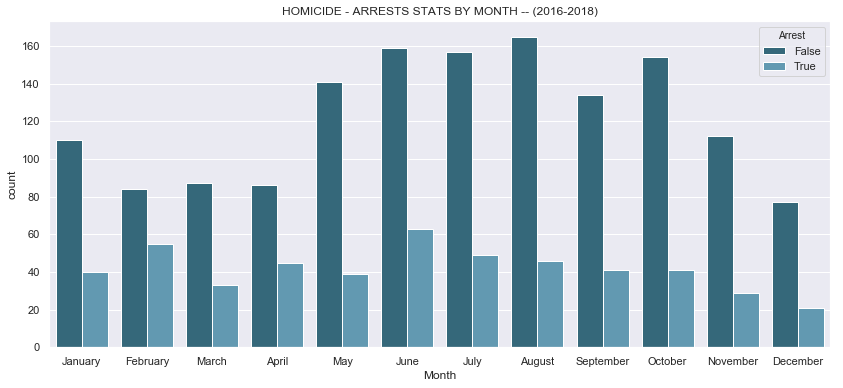

In [27]:
# create seaborn countplots for 2016 and 2017 -- high crime rate spike years

fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df_homicide[df_homicide['Year']>=2016][['Month','Arrest']],
                   palette="PuBuGn_d")
month_nms = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    
ax.set_xticklabels(month_nms)
plt.title('HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

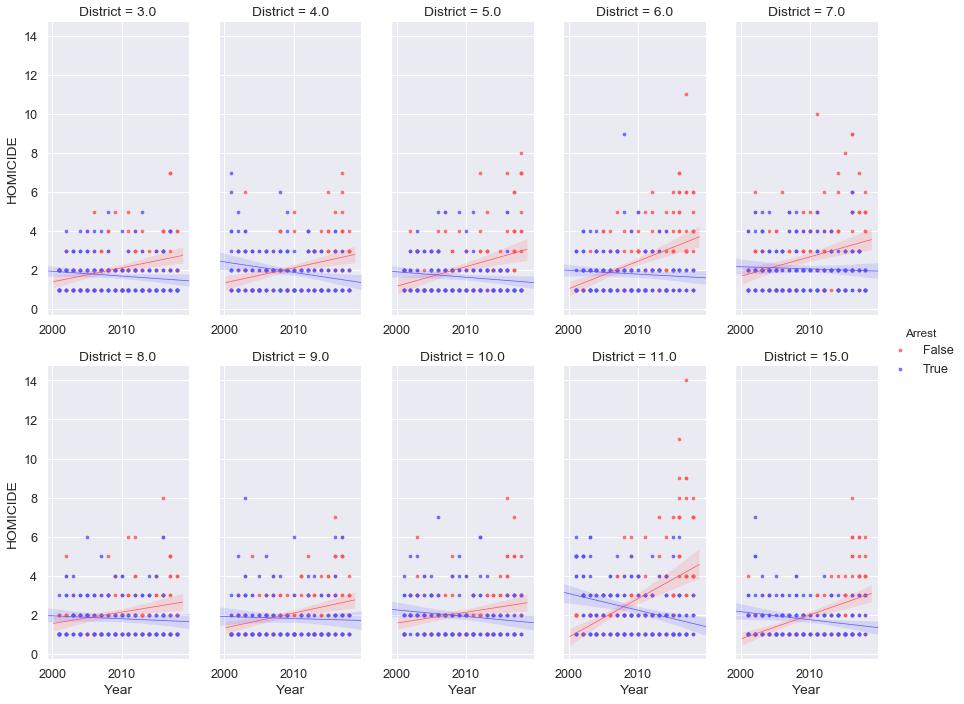

In [28]:
# create seaborn lmplot to compare arrest rates for different districts

dfx = df_homicide[df_homicide['District'].\
                isin(list(sorted_homicides.head(10)['District']))].\
                groupby(['District','Year','Month','Arrest'])['Primary Type'].\
                value_counts().unstack().reset_index()

with sns.plotting_context('notebook',font_scale=1.25):
    sns.set_context("notebook", font_scale=1.15)

    g = sns.lmplot('Year','HOMICIDE',
                   col='District',
                   col_wrap=5,
                   size=5,
                   aspect=0.5,
                   sharex=False,
                   data=dfx[:],
                   fit_reg=True,
                   hue="Arrest", 
                   palette=sns.color_palette("seismic_r", 2),
                   scatter_kws={"marker": "o",
                            "s": 7},
                   line_kws={"lw":0.7})

In [29]:
# plot chloropleth maps 2001 - 2017
def toString(x):
    return str(int(x))

df_homicide_allyears = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)

# plot 2016-2018 chloropleth map

# code for second map is available on github

def toString(x):
    return str(int(x))

df_homicide_allyears = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)

# Out[27]:
# In [26]:



c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [30]:
# plot 2016-2018 chloropleth map

def toString(x):
    return str(int(x))

df_homicide_after_2015 = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicide per Police District : 2016-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map2.html") 
IFrame('map2.html', width=990, height=700)

In [31]:
# plot heatmap all districts -- (2016-2018)

after_2015_geo = []
for index, row in df_homicide[df_homicide['Year']>=2016][['Latitude','Longitude','District']].dropna().iterrows():
    after_2015_geo.append([row["Latitude"], row["Longitude"],row['District']])
# ___________________________________________________________________
chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='HeatMap Homicides : 2016-2017',
    highlight=True
    )
m.add_child(plugins.HeatMap(after_2015_geo,
                            name='all_homicides_2016_to_2017',
                            radius=5,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

In [32]:
# plot yearly time lapse heatmap all districts -- (2001-2017)

chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
   
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.2, 
    line_opacity=0.2,
    legend_name='Homicides : 2001-2017',
    highlight=True
    )

heat_df = df_homicide[df_homicide['Year']>=2001].reset_index()
heat_df = heat_df[['Latitude', 'Longitude','Year']]
heat_df['Weight'] = heat_df['Year'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in\
            heat_df[heat_df.Weight == i].iterrows()] for i in range(2001,2018)]

m.add_child(plugins.HeatMapWithTime(data=heat_data,
                                   auto_play=True,
                                   max_opacity=0.8,
                                   display_index=True,
                                   radius=9,
                                   name='HeatMapWithTime')
           )

folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map4.html") 
IFrame('map4.html', width=990, height=700)

In [33]:
# geo locations of homicides crime scenes -- 2016-2017

df_homicide_after_2015 = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

after_2015 = df_homicide[df_homicide['Year']>=2016].dropna()

# _____________________________________________

lats = list(after_2015.Latitude)
longs = list(after_2015.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : 2016-2017',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map5.html") 
IFrame('map5.html', width=990, height=700)

## Part 3: Individual Inferences
Make *any* visualization to show an inference that you can make about the dataset that is not covered in the lab itself. Remember since it is a guided lab - this part might be the only thing that would make a difference in the marks! You can even go beyond Homicide rates and pick up - instead - any other crime that is not covered in the lab.

In [34]:
# create a dataframe with Homicide as the only crime

df_weapons_violation_temp = crime_data[crime_data['Primary Type']=='WEAPONS VIOLATION']
df_weapons_violation_temp.head()

# print some attributes of our new homicide dataframe

df_weapons_violation_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70705 entries, 12 to 6748761
Data columns (total 22 columns):
ID                      70705 non-null int64
Case Number             70705 non-null object
Date                    70705 non-null object
Block                   70705 non-null object
IUCR                    70705 non-null object
Primary Type            70705 non-null object
Description             70705 non-null object
Location Description    70704 non-null object
Arrest                  70705 non-null bool
Domestic                70705 non-null bool
Beat                    70705 non-null int64
District                70703 non-null float64
Ward                    65132 non-null float64
Community Area          65122 non-null float64
FBI Code                70705 non-null object
X Coordinate            70303 non-null float64
Y Coordinate            70303 non-null float64
Year                    70705 non-null int64
Updated On              70705 non-null object
Latitude        

NameError: name 'df_weapons_violations_temp' is not defined

In [35]:
df_weapons_violation_temp.isnull().sum()

# drop null values and confirm

df_weapons_violation = df_weapons_violation_temp.dropna()
df_weapons_violation.isnull().sum().sum()

df_weapons_violation = df_weapons_violation[keep_cols].reset_index()
df_weapons_violation.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,12,2015,03/18/2015 09:14:00 PM,WEAPONS VIOLATION,True,False,4.0,DRIVEWAY - RESIDENTIAL,15,1197309.0,1848290.0,41.738563,-87.552679,"(41.738563465, -87.552678593)"
1,24,2015,03/18/2015 09:44:00 PM,WEAPONS VIOLATION,True,False,15.0,VEHICLE NON-COMMERCIAL,15,1139051.0,1899715.0,41.880934,-87.764879,"(41.880934043, -87.764879438)"
2,66,2015,03/19/2015 12:09:00 AM,WEAPONS VIOLATION,True,False,18.0,SIDEWALK,15,1175558.0,1907139.0,41.900564,-87.630605,"(41.90056412, -87.630605473)"
3,168,2015,01/30/2015 04:57:39 PM,WEAPONS VIOLATION,True,False,11.0,STREET,15,1157652.0,1896577.0,41.871965,-87.696663,"(41.871964663, -87.696662932)"
4,340,2015,03/19/2015 01:10:00 PM,WEAPONS VIOLATION,True,False,25.0,SIDEWALK,15,1148369.0,1907676.0,41.902605,-87.730459,"(41.902605427, -87.730458643)"


In [36]:
# change string Date to datetime.datetime format

df_weapons_violation['Date'] = df_weapons_violation['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_weapons_violation.head()

# create new columns from date column -- Year, Month, Day, Hour, Minutes, DayOfWeek 

df_weapons_violation['Year'] = df_weapons_violation['Date'].dt.year
df_weapons_violation['Month'] = df_weapons_violation['Date'].dt.month
df_weapons_violation['Day'] = df_weapons_violation['Date'].dt.day
df_weapons_violation['Weekday'] = df_weapons_violation['Date'].dt.dayofweek
df_weapons_violation['HourOfDay'] = df_weapons_violation['Date'].dt.hour

df_weapons_violation = df_weapons_violation.sort_values('Date')
# print columns list and info

df_weapons_violation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64806 entries, 41776 to 64805
Data columns (total 18 columns):
index                   64806 non-null int64
Year                    64806 non-null int64
Date                    64806 non-null datetime64[ns]
Primary Type            64806 non-null object
Arrest                  64806 non-null bool
Domestic                64806 non-null bool
District                64806 non-null float64
Location Description    64806 non-null object
FBI Code                64806 non-null object
X Coordinate            64806 non-null float64
Y Coordinate            64806 non-null float64
Latitude                64806 non-null float64
Longitude               64806 non-null float64
Location                64806 non-null object
Month                   64806 non-null int64
Day                     64806 non-null int64
Weekday                 64806 non-null int64
HourOfDay               64806 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(6)

In [37]:
# save cleaned data to pickle file 
df_weapons_violation.to_pickle('df_weapons_violation.pkl') 
print('pickle size:', os.stat('df_weapons_violation.pkl').st_size)

# load pickled data 
df_weapons_violation = pd.read_pickle('df_weapons_violation.pkl')

pickle size: 9851442


c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'All Weapons Violation (2001-2018) per District')

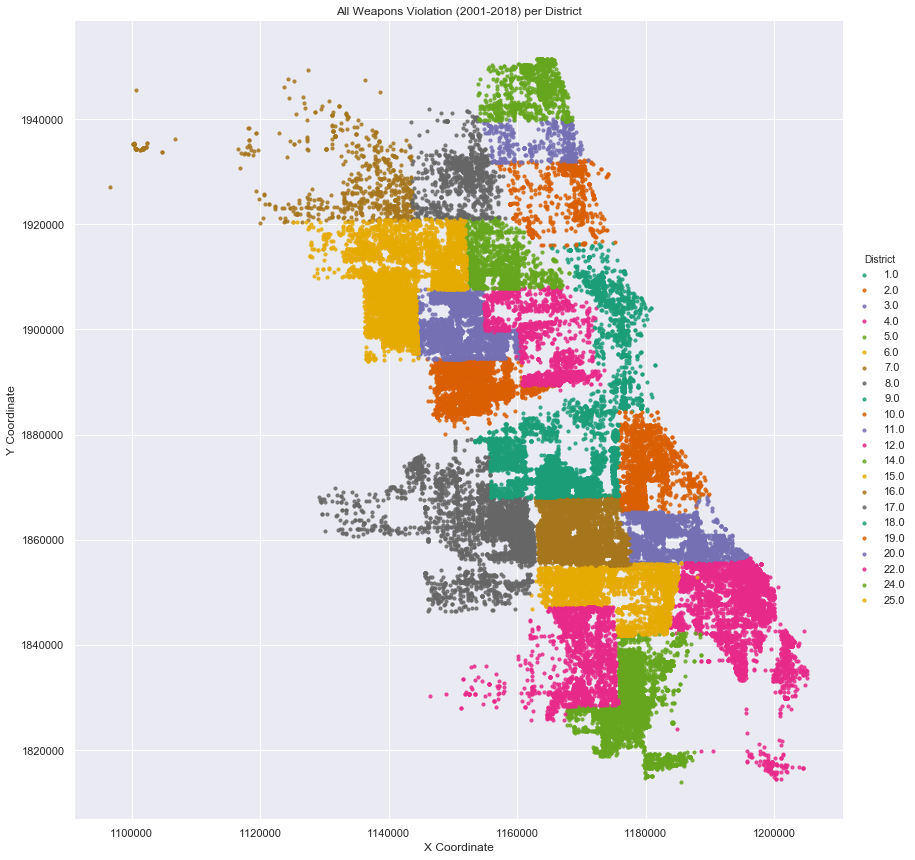

In [38]:
# plot all homicides in dataset by location per District

df_weapons_violation = df_weapons_violation.loc[(df_weapons_violation['X Coordinate']!=0)]

sns.lmplot('X Coordinate',
           'Y Coordinate',
           data=df_weapons_violation[:],
           fit_reg=False, 
           hue="District", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("All Weapons Violation (2001-2018) per District")

Text(0.5, 1.0, 'CHICAGO WEAPONS VIOLATION RATES: 2001 - 2018')

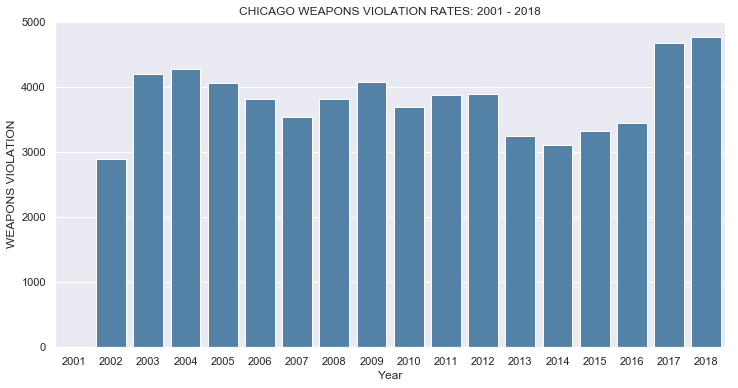

In [39]:
# plot bar chart of homicide rates for all years

plt.figure(figsize=(12,6))
sns.barplot(x='Year',
            y='WEAPONS VIOLATION',
            data=df_weapons_violation.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("CHICAGO WEAPONS VIOLATION RATES: 2001 - 2018")

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


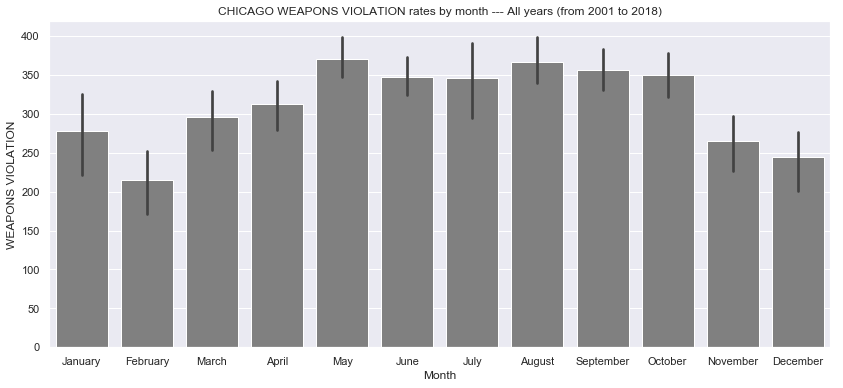

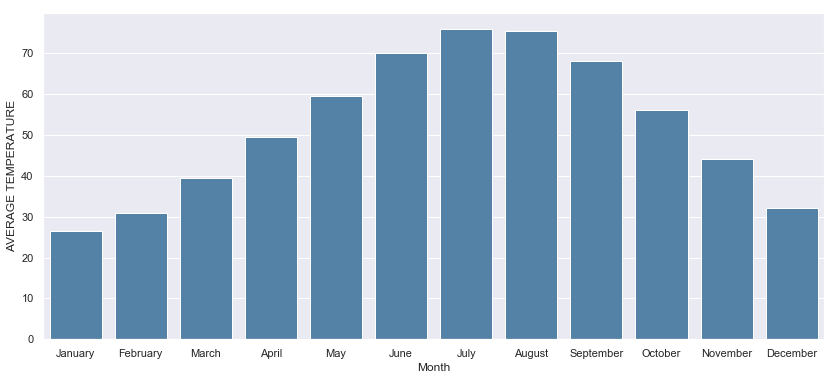

In [40]:

fig, ax = plt.subplots(figsize=(14,6))

fig = sns.barplot(x='Month', y='WEAPONS VIOLATION', data=df_weapons_violation.groupby(['Year', 'Month'])
                  ['Primary Type'].value_counts().unstack().reset_index(), color='#808080')

ax.set_xticklabels(month_names)
plt.title("CHICAGO WEAPONS VIOLATION rates by month --- All years (from 2001 to 2018)")


# plot average monthly temps in Chicago
# source of data:  ncdc.noaa.gov


df_temps = pd.DataFrame(list(zip(month_names,monthly_temp)),
                       columns=['Month','AVERAGE TEMPERATURE'])
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='Month', y='AVERAGE TEMPERATURE', data=df_temps,color='steelblue')

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'WEAPONS VIOLATION BY DAY OF THE WEEK -- All Years (2001 to 2008)')

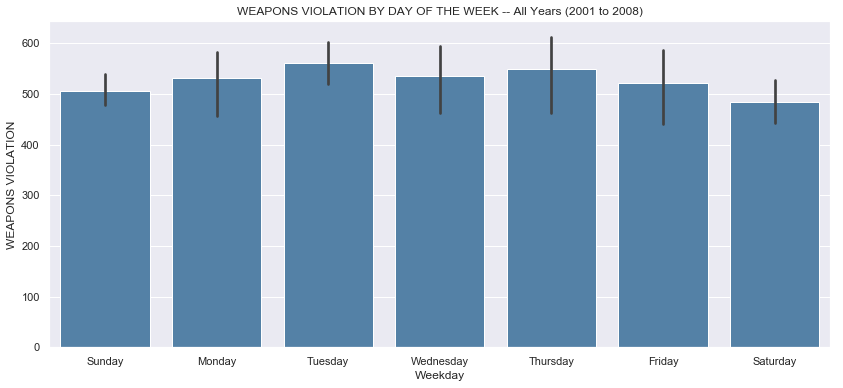

In [41]:
# plot homicide rates vs. day of the week

fig, ax = plt.subplots(figsize=(14,6))    
fig = sns.barplot(x='Weekday',
                  y='WEAPONS VIOLATION',
                  data=df_weapons_violation.groupby(['Year','Weekday'])['Primary Type'].
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('WEAPONS VIOLATION BY DAY OF THE WEEK -- All Years (2001 to 2008)')

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'WEAPONS VIOLATION BY HOUR OF THE DAY -- All Years')

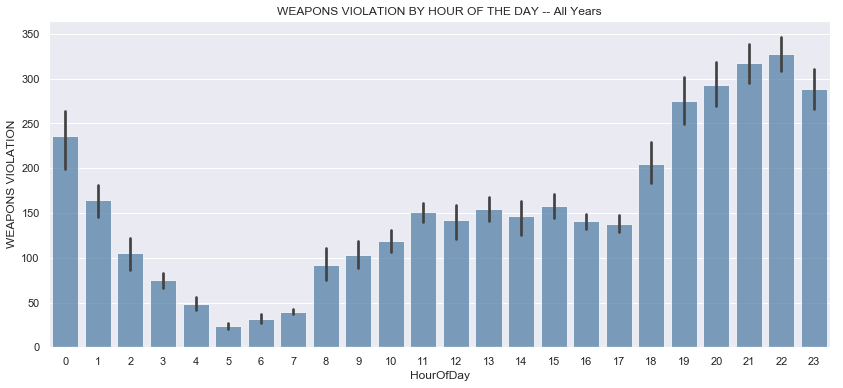

In [42]:
# use seaborn barplot to plot homicides vs. hour of the day 

fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='HourOfDay',
                  y='WEAPONS VIOLATION',
                  data=df_weapons_violation.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue',
                  alpha=.75)
plt.title('WEAPONS VIOLATION BY HOUR OF THE DAY -- All Years')

In [44]:
# visualize the "scene of the crime" vs. number of occurences at such scene

crime_scene_weapons = df_weapons_violation['Primary Type'].\
            groupby(df_weapons_violation['Location Description']).\
            value_counts().\
            unstack().\
            sort_values('WEAPONS VIOLATION',ascending=False).\
            reset_index()
    
# Top Homicide Crime Scene Locations
crime_scene_weapons.head(10)

Primary Type,Location Description,WEAPONS VIOLATION
0,STREET,18969
1,SIDEWALK,12133
2,RESIDENCE,7331
3,ALLEY,4472
4,APARTMENT,4293
5,"SCHOOL, PUBLIC, BUILDING",3868
6,VEHICLE NON-COMMERCIAL,1884
7,RESIDENTIAL YARD (FRONT/BACK),1813
8,RESIDENCE PORCH/HALLWAY,1493
9,OTHER,1331


c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CRIME SCENE BY LOCATION FREQUENCY')

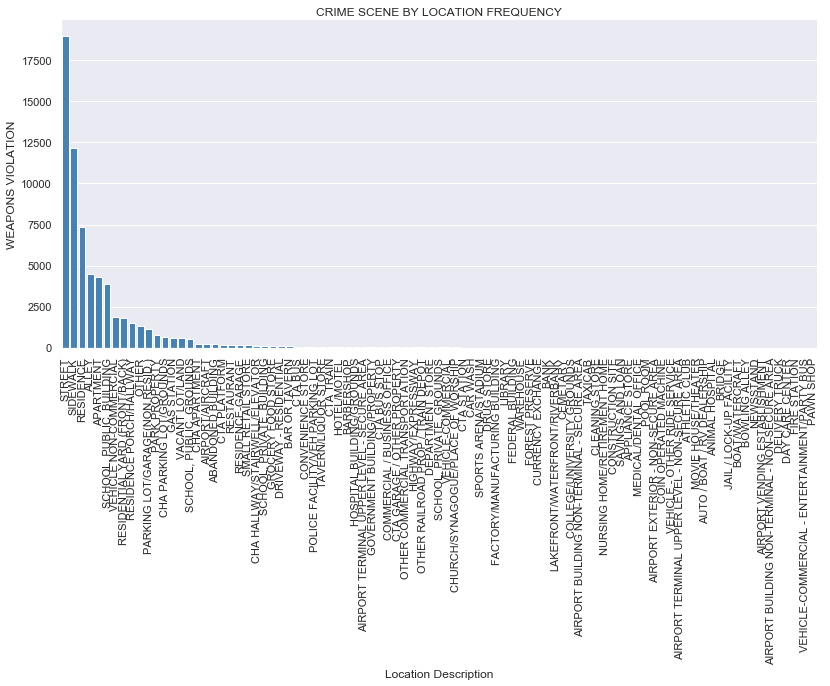

In [45]:
# create a count plot for all crime scene locations

g = sns.factorplot(x='Location Description',
                   y='WEAPONS VIOLATION',
                   data=crime_scene_weapons,
                   kind='bar',
                   size=10,
                   color='steelblue', 
                   saturation=10)

g.fig.set_size_inches(15,5)
g.set_xticklabels(rotation=90)
plt.title('CRIME SCENE BY LOCATION FREQUENCY')

Text(0.5, 1.0, 'WEAPONS VIOLATION vs DISTRICT vs YEAR')

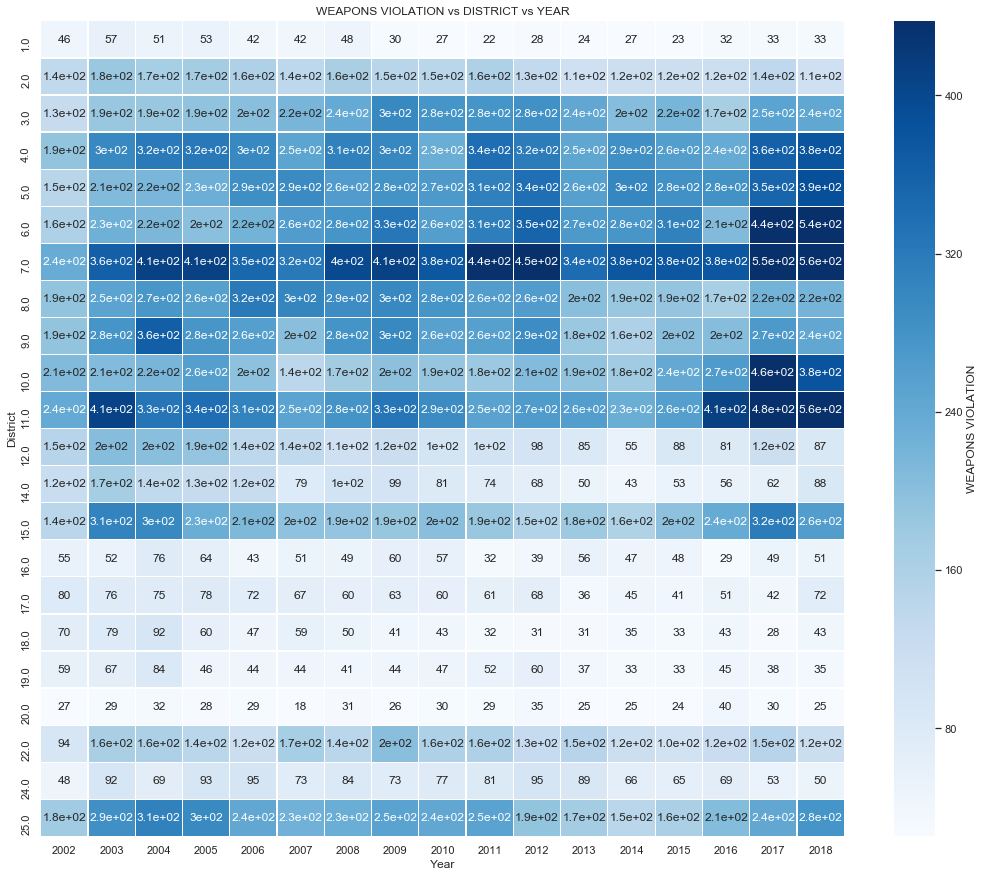

In [48]:
# create a heatmap showing crime by district by year

corr = df_weapons_violation.groupby(['District','Year']).count().Date.unstack()
fig, ax = plt.subplots(figsize=(18,15))
sns.set(font_scale=1.0)
sns.heatmap(corr.dropna(axis=1),
            annot=True,
           linewidths=0.2,
           cmap='Blues',
            robust=True,
           cbar_kws={'label': 'WEAPONS VIOLATION'})
plt.title('WEAPONS VIOLATION vs DISTRICT vs YEAR')

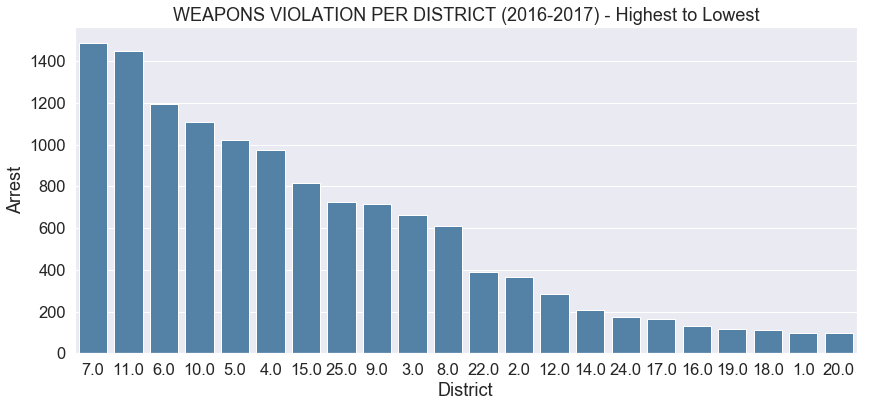

In [49]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_weapons = df_weapons_violation[df_weapons_violation['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_weapons,
                color='steelblue',
                order = list(sorted_weapons['District']),
                label='big')
    plt.title('WEAPONS VIOLATION PER DISTRICT (2016-2017) - Highest to Lowest')

In [50]:
# plot heatmap all districts -- (2016-2018)

df_weapons_after_2015 = df_weapons_violation[df_weapons_violation['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_weapons_after_2015['District'] = df_weapons_after_2015['District'].apply(toString)


after_2015_geo_weapons = []
for index, row in df_weapons_violation[df_weapons_violation['Year']>=2016][['Latitude','Longitude','District']].dropna().iterrows():
    after_2015_geo_weapons.append([row["Latitude"], row["Longitude"],row['District']])
# ___________________________________________________________________
chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_weapons_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='HeatMap Weapons Violation : 2016-2017',
    highlight=True
    )
m.add_child(plugins.HeatMap(after_2015_geo,
                            name='all_weapons_violation_2016_to_2017',
                            radius=5,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map7.html") 
IFrame('map7.html', width=990, height=700)

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [51]:
after_2015_weapons = df_weapons_violation[df_weapons_violation['Year']>=2016].dropna()

# _____________________________________________

lats_weapons = list(after_2015_weapons.Latitude)
longs_weapons = list(after_2015_weapons.Longitude)
locations_weapons = [lats_weapons,longs_weapons]

m = folium.Map(
    location=[np.mean(lats_weapons), np.mean(longs_weapons)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats_weapons, longs_weapons))).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_weapons_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Weapons Violation : 2016-2017',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map8.html") 
IFrame('map8.html', width=990, height=700)

c:\users\xenon\appdata\local\programs\python\python37\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
